In [1]:
import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
os.listdir("perf_out")

['perf_read_31threads_32keys.data',
 'perf_stat_read_1threads_16keys.txt',
 'perf_write_6threads_16keys.data',
 'perf_read_19threads_16keys.data',
 'perf_read_4threads_32keys.data',
 'perf_stat_read_19threads_16keys.txt',
 'perf-dbbench_read_numa_32threads_32keys.svg',
 'write_20threads_8keys.time',
 'read_numa_2threads_8keys.time',
 'perf-dbbench_write_26threads_16keys.svg',
 'perf_read_numa_11threads_8keys.data',
 'perf-dbbench_read_12threads_32keys.svg',
 'perf-dbbench_read_32threads_8keys.svg',
 'perf-dbbench_read_20threads_16keys.svg',
 'perf_read_numa_12threads_32keys.data',
 'read_numa_11threads_16keys.time',
 'perf_read_9threads_32keys.data',
 'perf_write_10threads_32keys.data',
 'perf-dbbench_write_14threads_32keys.svg',
 'perf_read_numa_3threads_16keys.data',
 'perf_read_14threads_16keys.data',
 'perf_stat_read_numa_19threads_32keys.txt',
 'read_20threads_8keys.time',
 'write_12threads_32keys.time',
 'perf_stat_read_numa_31threads_32keys.txt',
 'perf-dbbench_read_numa_3thread

In [3]:
def extract_threads_key_size(file):
    [threads, keys] = re.findall(r"\d+", file)
    return int(threads), int(keys)

In [4]:
def parse_times(file):
    with open(file) as f:
        lines = f.readlines()
        time_dict = dict()
        time_dict["real"] = float(lines[1].split("\t")[1].split("m")[0]) * 60 + float(lines[1].split("\t")[1].split("m")[1].split("s")[0])
        time_dict["user"] = float(lines[2].split("\t")[1].split("m")[0]) * 60 + float(lines[2].split("\t")[1].split("m")[1].split("s")[0])
        time_dict["sys"] = float(lines[3].split("\t")[1].split("m")[0]) * 60 + float(lines[3].split("\t")[1].split("m")[1].split("s")[0])
        return time_dict["real"]

In [5]:
times = {
    "read_numa": {
        8: {},
        16: {},
        32: {}
    },
    "read": {
        8: {},
        16: {},
        32: {}
    },
    "write": {
        8: {},
        16: {},
        32: {}
    }
}

for file in os.listdir("perf_out"):
    if file.startswith("read_numa"):
        threads, keys = extract_threads_key_size(file)
        times["read_numa"][keys][threads] = parse_times("perf_out/" + file)
    elif file.startswith("read"):
        threads, keys = extract_threads_key_size(file)
        times["read"][keys][threads] = parse_times("perf_out/" + file)
    elif file.startswith("write"):
        threads, keys = extract_threads_key_size(file)
        times["write"][keys][threads] = parse_times("perf_out/" + file)

In [15]:
times_seq = {
    8: {},
    16: {},
    32: {}
}

for file in os.listdir("perf_out_seq"):
    if file.endswith("time"):
        threads, keys = extract_threads_key_size(file)
        times_seq[keys][threads] = parse_times("perf_out_seq/" + file)

In [16]:
times8_read = [times["read"][8][x] for x in range(1,33)]
times8_read_numa = [times["read_numa"][8][x] for x in range(1,33)]
times8_write = [times["write"][8][x] for x in range(1,33)]
times8_write_seq = [times_seq[8][x] for x in range(1,33)]
times16_read = [times["read"][16][x] for x in range(1,33)]
times16_read_numa = [times["read_numa"][16][x] for x in range(1,33)]
times16_write = [times["write"][16][x] for x in range(1,33)]
times16_write_seq = [times_seq[16][x] for x in range(1,33)]
times32_read = [times["read"][32][x] for x in range(1,33)]
times32_read_numa = [times["read_numa"][32][x] for x in range(1,33)]
times32_write = [times["write"][32][x] for x in range(1,33)]
times32_write_seq = [times_seq[32][x] for x in range(1,33)]

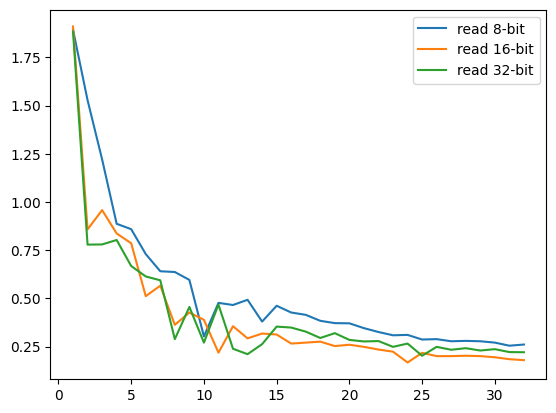

In [11]:
plt.plot(list(range(1,33)), times8_read, label="read 8-bit")
plt.plot(list(range(1,33)), times16_read, label="read 16-bit")
plt.plot(list(range(1,33)), times32_read, label="read 32-bit")

plt.legend()

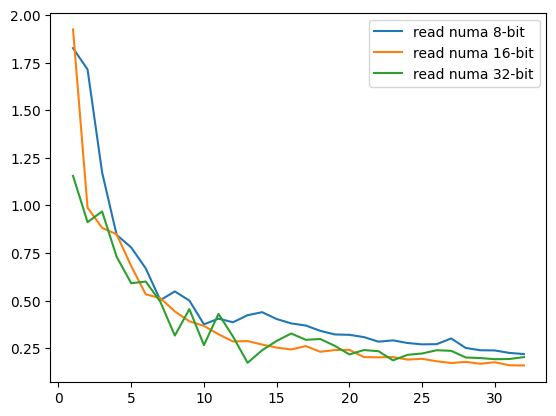

In [31]:
plt.plot(list(range(1,33)), times8_read_numa, label="read numa 8-bit")
plt.plot(list(range(1,33)), times16_read_numa, label="read numa 16-bit")
plt.plot(list(range(1,33)), times32_read_numa, label="read numa 32-bit")

plt.legend()

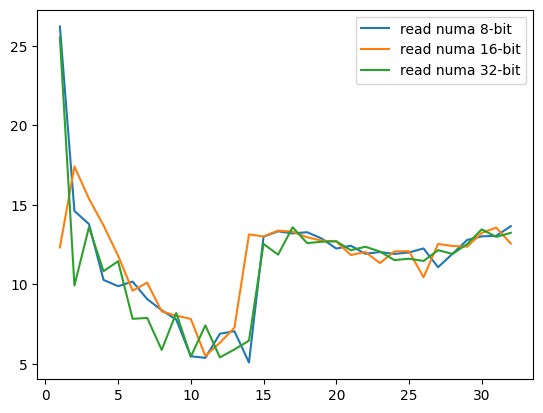

In [24]:
plt.plot(list(range(1,33)), times8_write, label="read numa 8-bit")
plt.plot(list(range(1,33)), times16_write, label="read numa 16-bit")
plt.plot(list(range(1,33)), times32_write, label="read numa 32-bit")

plt.legend()

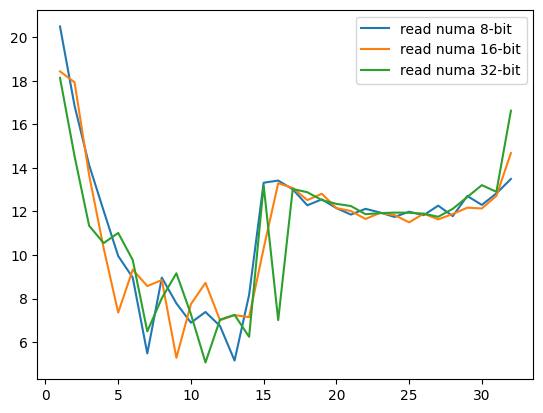

In [23]:
plt.plot(list(range(1,33)), times8_write_seq, label="read numa 8-bit")
plt.plot(list(range(1,33)), times16_write_seq, label="read numa 16-bit")
plt.plot(list(range(1,33)), times32_write_seq, label="read numa 32-bit")

plt.legend()

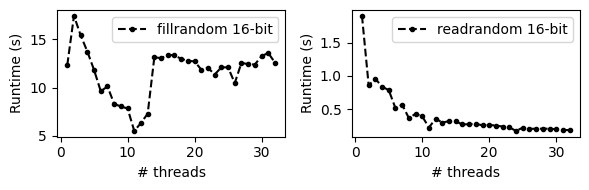

In [67]:
fig, axs = plt.subplots(1,2, figsize=(6,2))

axs[0].plot(list(range(1,33)), times16_write, label="fillrandom 16-bit", c="black", marker='.', linestyle='dashed')
axs[1].plot(list(range(1,33)), times16_read, label="readrandom 16-bit", c="black", marker='.', linestyle='dashed')

axs[0].legend()
axs[1].legend()

axs[0].set_xlabel("# threads")
axs[1].set_xlabel("# threads")

axs[0].set_ylabel("Runtime (s)")
axs[1].set_ylabel("Runtime (s)")

plt.tight_layout()

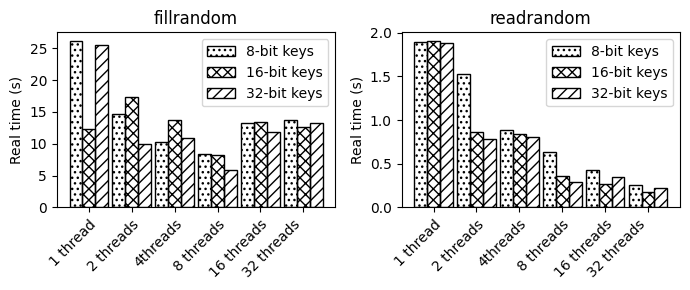

In [91]:
labels = ["1 thread", "2 threads", "4threads", "8 threads", "16 threads", "32 threads"]
idxs = [0,1,3,7,15,31]

fig, ax = plt.subplots(1,2,figsize=(7,3))
x = np.arange(len(labels))
width = 0.3

ax[0].bar(x - width, np.array(times8_write)[idxs], width, hatch="...", fill=None, label="8-bit keys")
ax[0].bar(x, np.array(times16_write)[idxs], width, hatch="xxx", fill=None, label="16-bit keys")
ax[0].bar(x + width, np.array(times32_write)[idxs], width, hatch="///", fill=None, label="32-bit keys")

for tick in ax[0].get_xticklabels():
    tick.set_rotation(45)
    tick.set_rotation_mode("anchor")
    tick.set_ha("right")
    
ax[0].legend()
ax[0].set_xticks(x, labels)
ax[0].set_ylabel("Real time (s)")
ax[0].set_title("fillrandom")

ax[1].bar(x - width, np.array(times8_read)[idxs], width, hatch="...", fill=None, label="8-bit keys")
ax[1].bar(x, np.array(times16_read)[idxs], width, hatch="xxx", fill=None, label="16-bit keys")
ax[1].bar(x + width, np.array(times32_read)[idxs], width, hatch="///", fill=None, label="32-bit keys")

for tick in ax[1].get_xticklabels():
    tick.set_rotation(45)
    tick.set_rotation_mode("anchor")
    tick.set_ha("right")
    
ax[1].legend()
ax[1].set_xticks(x, labels)
ax[1].set_ylabel("Real time (s)")
ax[1].set_title("readrandom")

plt.tight_layout()

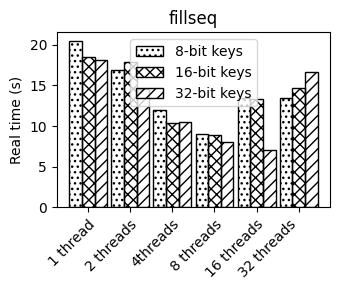

In [20]:
labels = ["1 thread", "2 threads", "4threads", "8 threads", "16 threads", "32 threads"]
idxs = [0,1,3,7,15,31]

fig, ax = plt.subplots(figsize=(3.5,3))
x = np.arange(len(labels))
width = 0.3

ax.bar(x - width, np.array(times8_write_seq)[idxs], width, hatch="...", fill=None, label="8-bit keys")
ax.bar(x, np.array(times16_write_seq)[idxs], width, hatch="xxx", fill=None, label="16-bit keys")
ax.bar(x + width, np.array(times32_write_seq)[idxs], width, hatch="///", fill=None, label="32-bit keys")

for tick in ax.get_xticklabels():
    tick.set_rotation(45)
    tick.set_rotation_mode("anchor")
    tick.set_ha("right")
    
ax.legend()
ax.set_xticks(x, labels)
ax.set_ylabel("Real time (s)")
ax.set_title("fillseq")

plt.tight_layout()

In [22]:
list(enumerate(times16_write_seq))

[(0, 18.436),
 (1, 17.935),
 (2, 13.679),
 (3, 10.316),
 (4, 7.355),
 (5, 9.326),
 (6, 8.572),
 (7, 8.85),
 (8, 5.275),
 (9, 7.745),
 (10, 8.72),
 (11, 7.002),
 (12, 7.238),
 (13, 7.145),
 (14, 10.305),
 (15, 13.298),
 (16, 13.082),
 (17, 12.522),
 (18, 12.814),
 (19, 12.155),
 (20, 12.02),
 (21, 11.655),
 (22, 11.935),
 (23, 11.834),
 (24, 11.499),
 (25, 11.899),
 (26, 11.637),
 (27, 11.884),
 (28, 12.174),
 (29, 12.138),
 (30, 12.716),
 (31, 14.686)]

In [ ]:
plt.plot()